# Lab 1 Analysis Example using Thicket

In [375]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read in all the files

In [446]:
tk = th.Thicket.from_caliperreader(glob("*random.cali")) # dividing it by input type for now
tk.statsframe.dataframe["time"] = 1

In [447]:
print(tk.tree())

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.0

1.000 main
├─ 1.000 comm
│  ├─ 1.000 MPI_Barrier
│  └─ 1.000 comm_large
│     ├─ 1.000 MPI_Gather
│     └─ 1.000 MPI_Scatter
├─ 1.000 comp
│  └─ 1.000 comp_large
├─ 1.000 correctness_check
└─ 1.000 data_init

Legend (Metric: time Min: 1.00 Max: 1.00)
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



In [448]:
# Performance data
tk.dataframe

nid  \
node                                              profile           
{'name': 'main', 'type': 'function'}              94276197      1   
                                                  684115475     1   
                                                  1334158880    1   
                                                  1623070311    1   
                                                  2001593674    1   
                                                  2004720918    1   
                                                  2039840440    1   
                                                  3211007287    1   
                                                  3214940410    1   
{'name': 'comm', 'type': 'function'}              94276197      3   
                                                  684115475     3   
                                                  1334158880    3   
                                                  1623070311    3   
                                                  2001593674    3   
                                                  2004720918    3   
                                                  2039840440    3   
                                                  3211007287    3   
                                                  3214940410    3   
{'name': 'MPI_Barrier', 'type': 'function'}       94276197      4   
                                                  684115475     4   
                                                  1334158880    4   
                                                  1623070311    4   
                                                  2001593674    4   
                                                  2004720918    4   
                                                  2039840440    4   
                                                  3211007287    4   
                                                  3214940410    4   
{'name': 'comm_large', 'type': 'function'}        94276197      5   
                                                  684115475     5   
                                                  1334158880    5   
                                                  1623070311    5   
                                                  2001593674    5   
                                                  2004720918    5   
                                                  2039840440    5   
                                                  3211007287    5   
                                                  3214940410    5   
{'name': 'MPI_Gather', 'type': 'function'}        94276197      9   
                                                  684115475     9   
                                                  1334158880    9   
                                                  1623070311    9   
                                                  2001593674    9   
                                                  2004720918    9   
                                                  2039840440    9   
                                                  3211007287    9   
                                                  3214940410    9   
{'name': 'MPI_Scatter', 'type': 'function'}       94276197      6   
                                                  684115475     6   
                                                  1334158880    6   
                                                  1623070311    6   
                                                  2001593674    6   
                                                  2004720918    6   
                                                  2039840440    6   
                                                  3211007287    6   
                                                  3214940410    6   
{'name': 'comp', 'type': 'function'}              94276197      7   
                                                  684115475     7   
                                                  1334158880

Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [449]:
tk.metadata

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:node.order,spot:output,spot:time.variance,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_procs,num_threads,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,,,
94276197,2.11.0-dev,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p2-a1048576-random.cali,true,1700003383,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./oddEvenMPI, 1048576, random]",c,OddEvenSort,MPI,float,4,1048576,Random,2,1,19,Used lab 2 and https://www.geeksforgeeks.org/i...
684115475,2.11.0-dev,4,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p4-a262144-random.cali,true,1700004546,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./oddEvenMPI, 262144, random]",c,OddEvenSort,MPI,float,4,262144,Random,4,1,19,Used lab 2 and https://www.geeksforgeeks.org/i...
1334158880,2.11.0-dev,4,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p4-a65536-random.cali,true,1700004527,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./oddEvenMPI, 65536, random]",c,OddEvenSort,MPI,float,4,65536,Random,4,1,19,Used lab 2 and https://www.geeksforgeeks.org/i...
1623070311,2.11.0-dev,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p8-a65536-random.cali,true,1700005549,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./oddEvenMPI, 65536, random]",c,OddEvenSort,MPI,float,4,65536,Random,8,1,19,Used lab 2 and https://www.geeksforgeeks.org/i...
2001593674,2.11.0-dev,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p2-a65536-random.cali,true,1700003231,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./oddEvenMPI, 65536, random]",c,OddEvenSort,MPI,float,4,65536,Random,2,1,19,Used lab 2 and https://www.geeksforgeeks.org/i...
2004720918,2.11.0-dev,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p8-a262144-random.cali,true,1700005557,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./oddEvenMPI, 262144, random]",c,OddEvenSort,MPI,float,4,262144,Random,8,1,19,Used lab 2 and https://www.geeksforgeeks.org/i...
2039840440,2.11.0-dev,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p8-a1048576-random.cali,true,1700005606,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./oddEvenMPI, 1048576, random]",c,OddEvenSort,MPI,float,4,1048576,Random,8,1,19,Used lab 2 and https://www.geeksforgeeks.org/i...
3211007287,2.11.0-dev,4,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p4-a1048576-random.cali,true,1700004593,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./oddEvenMPI, 1048576, random]",c,OddEvenSort,MPI,float,4,1048576,Random,4,1,19,Used lab 2 and https://www.geeksforgeeks.org/i...
3214940410,2.11.0-dev,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p2-a262144-random.cali,true,1700003321,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./oddEvenMPI, 262144, random]",c,OddEvenSort,MPI,float,4,262144,Random,2,1,19,Used lab 2 and https://www.geeksforgeeks.org/i...


In [450]:
gb = tk.groupby("InputSize")

3  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2b16abc7dee0>, 262144: <thicket.thicket.Thicket object at 0x2b16ad13de50>, 1048576: <thicket.thicket.Thicket object at 0x2b16ac0e0580>}


Compose these 3 groups column-wise to get a holistic view of the data

In [451]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="mpi.world.size"
)

In [452]:
ctk.dataframe

65536  \
                                                                   nid   
node                                              mpi.world.size         
{'name': 'main', 'type': 'function'}              2                  1   
                                                  4                  1   
                                                  8                  1   
{'name': 'comm', 'type': 'function'}              2                  3   
                                                  4                  3   
                                                  8                  3   
{'name': 'MPI_Barrier', 'type': 'function'}       2                  4   
                                                  4                  4   
                                                  8                  4   
{'name': 'comm_large', 'type': 'function'}        2                  5   
                                                  4                  5   
                                                  8                  5   
{'name': 'MPI_Gather', 'type': 'function'}        2                  9   
                                                  4                  9   
                                                  8                  9   
{'name': 'MPI_Scatter', 'type': 'function'}       2                  6   
                                                  4                  6   
                                                  8                  6   
{'name': 'comp', 'type': 'function'}              2                  7   
                                                  4                  7   
                                                  8                  7   
{'name': 'comp_large', 'type': 'function'}        2                  8   
                                                  4                  8   
                                                  8                  8   
{'name': 'correctness_check', 'type': 'function'} 2                 10   
                                                  4                 10   
                                                  8                 10   
{'name': 'data_init', 'type': 'function'}         2                  2   
                                                  4                  2   
                                                  8                  2   

                                                                                 \
                                                                   spot.channel   
node                                              mpi.world.size                  
{'name': 'main', 'type': 'function'}              2               regionprofile   
                                                  4               regionprofile   
                                                  8               regionprofile   
{'name': 'comm', 'type': 'function'}              2               regionprofile   
                                                  4               regionprofile   
                                                  8               regionprofile   
{'name': 'MPI_Barrier', 'type': 'function'}       2               regionprofile   
                                                  4               regionprofile   
                                                  8               regionprofile   
{'name': 'comm_large', 'type': 'function'}        2               regionprofile   
                                                  4               regionprofile   
                                                  8               regionprofile   
{'name': 'MPI_Gather', 'type': 'function'}        2               regionprofile   
                                                  4               regionprofile   
                                                  8               regionprofile   
{'name': 'MPI_Scatter', 'type': 'function'}       2               regionprofile   
                                             

Perform pandas operations to get the table in a desirable format for plotting

In [453]:
# Drop unwanted columns
ctk.dataframe = ctk.dataframe.reset_index().drop([("node", ""), (65536, "nid"), (262144, "nid"), (1048576, "nid")], axis=1)
# Rename index to remove tuple
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("mpi.world.size", ""): "mpi.world.size"}).set_index(["name", "mpi.world.size"])
ctk.dataframe

65536                                \
                                   spot.channel Min time/rank Max time/rank   
name              mpi.world.size                                              
main              2               regionprofile      7.299255      7.302882   
                  4               regionprofile      4.066194      4.125003   
                  8               regionprofile     14.419187     14.488508   
comm              2               regionprofile      0.034767      0.077180   
                  4               regionprofile      0.029604      0.063996   
                  8               regionprofile      0.069524      0.146394   
MPI_Barrier       2               regionprofile      0.034374      0.039734   
                  4               regionprofile      0.029385      0.046591   
                  8               regionprofile      0.069351      0.110621   
comm_large        2               regionprofile      0.000335      0.037398   
                  4               regionprofile      0.000172      0.025624   
                  8               regionprofile      0.000119      0.075536   
MPI_Gather        2               regionprofile      0.000125      0.037134   
                  4               regionprofile      0.000088      0.025411   
                  8               regionprofile      0.000045      0.075313   
MPI_Scatter       2               regionprofile      0.000153      0.000211   
                  4               regionprofile      0.000053      0.000171   
                  8               regionprofile      0.000042      0.000180   
comp              2               regionprofile      6.755227      6.782834   
                  4               regionprofile      3.258697      3.282178   
                  8               regionprofile      1.534437      1.580844   
comp_large        2               regionprofile      6.755174      6.782793   
                  4               regionprofile      3.258654      3.282145   
                  8               regionprofile      1.534412      1.580821   
correctness_check 2               regionprofile      0.000212      0.000212   
                  4               regionprofile      0.000217      0.000217   
                  8               regionprofile      0.000208      0.000208   
data_init         2               regionprofile      0.001441      0.001441   
                  4               regionprofile      0.001425      0.001425   
                  8               regionprofile      0.001404      0.001404   

                                                                               \
                                 Avg time/rank  Total time Variance time/rank   
name              mpi.world.size                                                
main              2                   7.301068   14.602137           0.000003   
                  4                   4.097503   16.390013           0.000456   
                  8                  14.453519  115.628155           0.000506   
comm              2                   0.055973    0.111946           0.000450   
                  4                   0.045782    0.183127           0.000151   
                  8                   0.096566    0.772525           0.000581   
MPI_Barrier       2                   0.037054    0.074107           0.000007   
                  4                   0.039199    0.156796           0.000041   
                  8                   0.085217    0.681737           0.000193   
comm_large        2                   0.018867    0.037733           0.000343   
                  4                   0.006541    0.026164           0.000121   
                  8                   0.011305    0.090439           0.000610   
MPI_Gather        2                   0.018630    0.037259           0.000342   
                  4                   0.006423    0.025693           0.000120   
                  8                   0.011208    0.089

In [454]:
# Define common variables
function_names = set(ctk.dataframe.index.get_level_values("name"))
print(function_names)
processes = sorted(list(set(ctk.dataframe.index.get_level_values("mpi.world.size"))))
print(processes)
array_sizes = [65536, 262144, 1048576] # append as necessary
print(array_sizes)

{'MPI_Scatter', 'data_init', 'MPI_Barrier', 'comm', 'MPI_Gather', 'main', 'comm_large', 'comp', 'correctness_check', 'comp_large'}
[2, 4, 8]
[65536, 262144, 1048576]


In [455]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    
    ax.plot(
        df[0],
        marker='o',
    )
    
    ax.plot(
        df[1],
        marker='o',
    )
    
    ax.plot(
        df[2],
        marker='o',
    )
    
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.grid(True)
    plt.legend(["Min time/rank", "Max time/rank", "Avg time/rank"]) 
    plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(processes)
    plt.show()
    return fig, ax

In [459]:
print(ctk.dataframe.loc["comp"][1048576])

                 spot.channel  Min time/rank  Max time/rank  Avg time/rank  \
mpi.world.size                                                               
2               regionprofile    1800.073328    1800.339214    1800.206271   
4               regionprofile     894.719121     896.325959     895.536068   
8               regionprofile     445.867216     447.032370     446.318345   

                 Total time  Variance time/rank  
mpi.world.size                                   
2               3600.412542            0.017674  
4               3582.144271            0.326143  
8               3570.546756            0.162043  


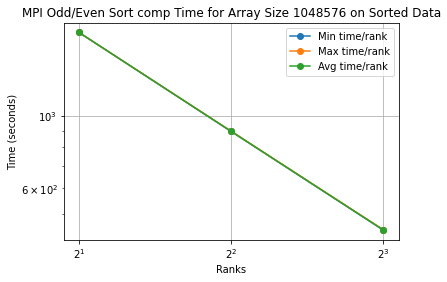

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'MPI Odd/Even Sort comp Time for Array Size 1048576 on Sorted Data'}, xlabel='Ranks', ylabel='Time (seconds)'>)

In [458]:
name = "comp"
arraySize = 1048576
plot_mpl(
    df=[ctk.dataframe.loc[name][arraySize]["Min time/rank"],
        ctk.dataframe.loc[name][arraySize]["Max time/rank"],
        ctk.dataframe.loc[name][arraySize]["Avg time/rank"]
        ], 
    title="MPI Odd/Even Sort {} Time for Array Size {} on Sorted Data".format(name, arraySize),
    xlabel="Ranks",
    ylabel="Time (seconds)",
)